<a href="https://colab.research.google.com/github/AleksanderHal/arpdata/blob/main/PROJEKT_KONCOWY2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#IMPORT

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [43]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 350)

df = pd.read_csv(r"/content/flights[1].csv")
airports = pd.read_csv(r"/content/airports[1].csv")
airlines = pd.read_csv(r"/content/airlines[1].csv")
airlines = airlines.rename(columns={'AIRLINE': 'AL_FULLNAME', 'IATA_CODE': 'AIRLINE'})

#convert column names to lowercase
df.columns = df.columns.str.lower()
airlines.columns = airlines.columns.str.lower()
airports.columns = airports.columns.str.lower()

In [44]:
import pandas as pd

# Merge airlines and flights data to get full names of airlines
df = df.merge(airlines, how='left', on='airline')

# Merge origin airport data onto the main df
merged_df = df.merge(airports, left_on='origin_airport', right_on='iata_code', how='left')

# Rename columns
column_rename_mapping = {
    'airport': 'origin_airport_name',
    'city': 'origin_city',
    'state': 'origin_state',
    'country': 'origin_country',
    'latitude': 'origin_latitude',
    'longitude': 'origin_longitude'
}
merged_df = merged_df.rename(columns=column_rename_mapping)

# Drop the 'iata_code' column
merged_df = merged_df.drop('iata_code', axis=1)






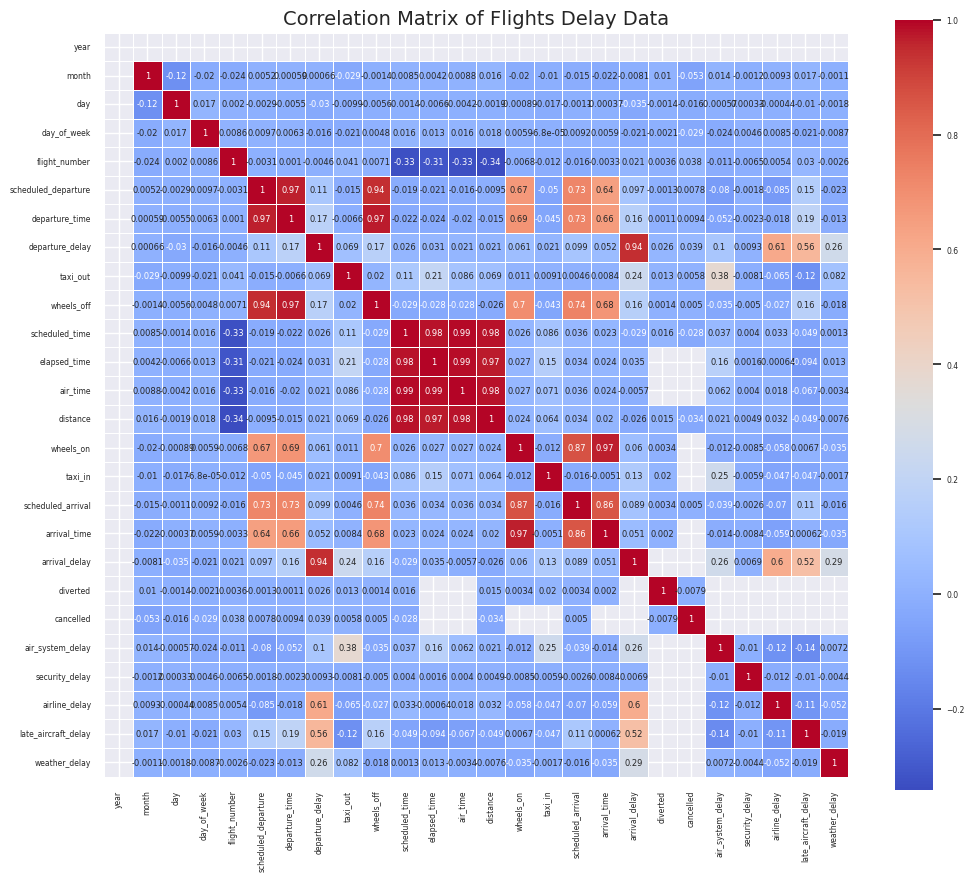

In [45]:
# Drop rows with NaN in the 'departure_delay' and 'arrival_delay' columns for cancelation prediction
#merged_df.dropna(subset=['departure_delay', 'arrival_delay', 'cancelled'], inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Set a larger figure size and adjust font size
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.5)

# Create a heatmap to visualize the correlation matrix with improved readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

plt.title("Correlation Matrix of Flights Delay Data", fontsize=14)
plt.show()

In [46]:

# Merge destination airport data onto the main df, rename columns, and drop 'iata_code'
df = pd.merge(merged_df, airports, left_on='destination_airport', right_on='iata_code', how='left')\
    .rename(columns={
        'airport': 'destination_airport_name',
        'city': 'destination_city',
        'state': 'destination_state',
        'country': 'destination_country',
        'latitude': 'destination_latitude',
        'longitude': 'destination_longitude'
    })\
    .drop('iata_code', axis=1)

In [47]:
result = pd.DataFrame({
    'Data Types': df.dtypes,
    'Null Values': df.isnull().sum(),
    'Null Percent': (df.isnull().mean() * 100),
    'Unique Values': df.nunique()
}).T

# Display the result
result

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,al_fullname,origin_airport_name,origin_city,origin_state,origin_country,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_country,destination_latitude,destination_longitude
Data Types,int64,int64,int64,int64,object,float64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,object,object,object,object,object,float64,float64,object,object,object,object,float64,float64
Null Values,0,0,0,0,0,1,10104,1,1,1,56884,56884,58420,58420,7,66119,66119,1,60351,60351,1,60351,66119,1,1,2597395,2139212,2139212,2139212,2139212,2139212,0,1,1,1,1,2197,2197,1,1,1,1,2197,2197
Null Percent,0.0,0.0,0.0,0.0,0.0,0.000038,0.380377,0.000038,0.000038,0.000038,2.141463,2.141463,2.199287,2.199287,0.000264,2.489125,2.489125,0.000038,2.271982,2.271982,0.000038,2.271982,2.489125,0.000038,0.000038,97.78189,80.533069,80.533069,80.533069,80.533069,80.533069,0.0,0.000038,0.000038,0.000038,0.000038,0.082709,0.082709,0.000038,0.000038,0.000038,0.000038,0.082709,0.082709
Unique Values,1,6,31,7,14,6606,4674,321,321,1275,1440,1033,184,1440,510,706,671,1317,1440,182,1393,1440,1067,2,2,4,507,116,870,600,534,14,321,307,54,1,318,318,321,307,54,1,318,318


In [48]:
#drop columns with little variability/not useful in prediciton/visualization or redundant
df = df.drop(columns = ['flight_number', 'tail_number', 'taxi_out',
                   'wheels_off', 'air_time', 'taxi_in', 'diverted',
                  'cancellation_reason', 'air_system_delay', 'security_delay',
                   'airline_delay', 'late_aircraft_delay', 'weather_delay', 'destination_country',
                       'origin_country'])
df.head()
df

,year,month,day,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,distance,wheels_on,scheduled_arrival,arrival_time,arrival_delay,cancelled,al_fullname,origin_airport_name,origin_city,origin_state,origin_latitude,origin_longitude,destination_airport_name,destination_city,destination_state,destination_latitude,destination_longitude
0,2015,1,1,4,AS,ANC,SEA,5.0,2354.0,-11.0,205.0,194.0,1448.0,404.0,430.0,408.0,-22.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,AA,LAX,PBI,10.0,2.0,-8.0,280.0,279.0,2330.0,737.0,750.0,741.0,-9.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,26.68316,-80.09559
2,2015,1,1,4,US,SFO,CLT,20.0,18.0,-2.0,286.0,293.0,2296.0,800.0,806.0,811.0,5.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,35.21401,-80.94313
3,2015,1,1,4,AA,LAX,MIA,20.0,15.0,-5.0,285.0,281.0,2342.0,748.0,805.0,756.0,-9.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,Miami International Airport,Miami,FL,25.79325,-80.29056
4,2015,1,1,4,AS,SEA,ANC,25.0,24.0,-1.0,235.0,215.0,1448.0,254.0,320.0,259.0,-21.0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656310,2015,6,17,3,UA,BUF,ORD,720.0,718.0,-2.0,105.0,120.0,473.0,808.0,805.0,818.0,13.0,0.0,United Air Lines Inc.,Buffalo Niagara International Airport,Buffalo,NY,42.94052,-78.73217,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446
2656311,2015,6,17,3,UA,PIT,ORD,720.0,724.0,4.0,92.0,88.0,413.0,741.0,752.0,752.0,0.0,0.0,United Air Lines Inc.,Pittsburgh International Airport,Pittsburgh,PA,40.49147,-80.23287,Chicago O'Hare International Airport,Chicago,IL,41.97960,-87.90446
2656312,2015,6,17,3,UA,BOS,IAH,720.0,800.0,40.0,241.0,238.0,1597.0,1047.0,1021.0,1058.0,37.0,0.0,United Air Lines Inc.,Gen. Edward Lawrence Logan International Airport,Boston,MA,42.36435,-71.00518,George Bush Intercontinental Airport,Houston,TX,29.98047,-95.33972
2656313,2015,6,17,3,UA,IAH,SFO,720.0,755.0,35.0,237.0,254.0,1635.0,1002.0,917.0,1009.0,52.0,0.0,United Air Lines Inc.,George Bush Intercontinental Airport,Houston,TX,29.98047,-95.33972,San Francisco International Airport,San Francisco,CA,37.61900,-122.37484


In [49]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['week_number'] = df['date'].dt.strftime('%U')
df['sched_hour'] = df['departure_time'] // 100  # Assuming you want to extract the hour from 'departure_time'
df['dow_name'] = df['date'].dt.strftime('%A')

In [50]:
def season_cat(x):
    season_mapping = {
        12: 'winter',
        1: 'winter',
        2: 'winter',
        3: 'spring',
        4: 'spring',
        5: 'spring',
        6: 'summer',
        7: 'summer',
        8: 'summer'
    }
    return season_mapping.get(x, 'autumn')

In [51]:
# Create a new column for the season
df['season'] = df['month'].apply(season_cat)

# Drop the 'year' column
df.drop(columns='year', inplace=True)

In [52]:
# Find unmatched origin airports
unmatched_origin_airports = set(df['origin_airport']) - set(airports['iata_code'])

# Find unmatched destination airports
unmatched_destination_airports = set(df['destination_airport']) - set(airports['iata_code'])

# Calculate the number of unmatched origin airports
num_unmatched_origin_airports = len(unmatched_origin_airports)

num_unmatched_origin_airports  # This will give you the count of unmatched origin airports

1

In [53]:
from datetime import datetime
import pandas as pd

# Function to convert float time to string time format
def convert_float_time(float_time):
    if pd.notna(float_time):
        float_time = str(int(float_time)).zfill(4)  # Ensure 4 characters
        hour = int(float_time[:2])  # Extract the hour
        minute = int(float_time[2:])  # Extract the minutes
        if hour >= 24:
            hour = hour % 24
        return f"{hour:02d}:{minute:02d}:00"
    return None

# Apply the conversion function to the time-related columns
time_columns = ['arrival_time', 'departure_time', 'scheduled_departure']
for col in time_columns:
    df[col] = df[col].apply(convert_float_time)

# Combine date and scheduled departure columns into a single datetime column
df['scheduled_departure_datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['scheduled_departure'], format='%Y%m%d %H:%M:%S')

# Get the hour from the scheduled departure time and store it in a new column
df['sched_hour'] = df['scheduled_departure_datetime'].dt.strftime('%H')

#EDA


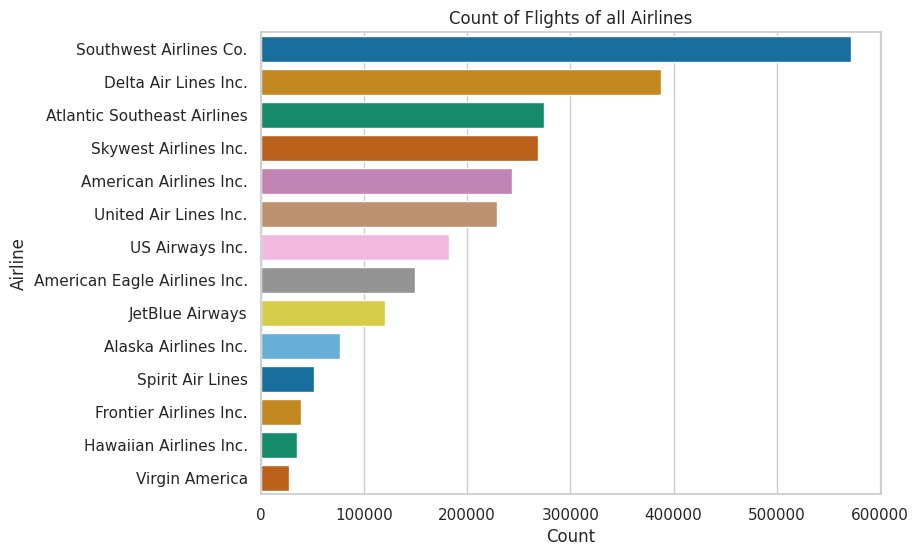

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of all unique airlines
airline_counts = df['al_fullname'].value_counts().sort_values(ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=airline_counts.values, y=airline_counts.index, palette="colorblind")

# Set plot title and axis labels
plt.title("Count of Flights of all Airlines")
plt.xlabel("Count")
plt.ylabel("Airline")

# Display the plot
plt.show()


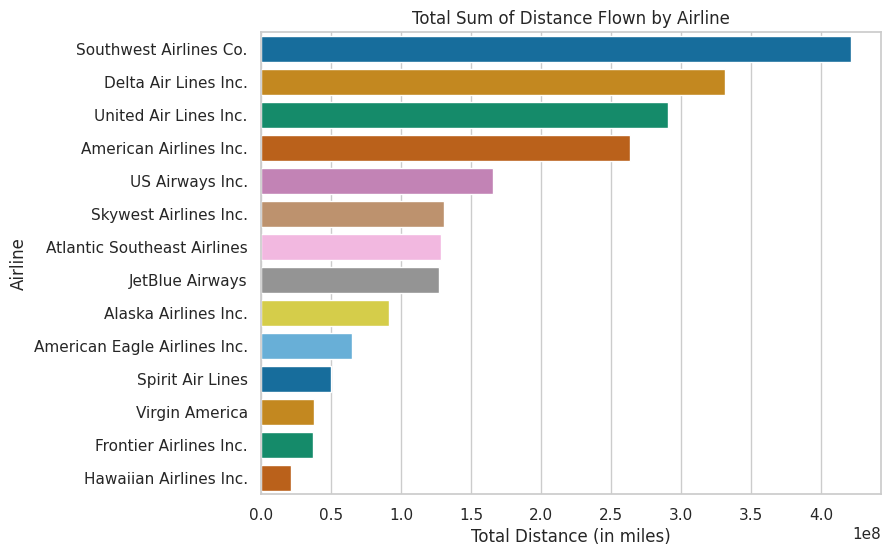

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total distance flown by each airline
airline_sum_distance = df.groupby('al_fullname')['distance'].sum().sort_values(ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=airline_sum_distance.values, y=airline_sum_distance.index, palette="colorblind")

# Set plot title and axis labels
plt.title("Total Sum of Distance Flown by Airline")
plt.xlabel("Total Distance (in miles)")
plt.ylabel("Airline")

# Display the plot
plt.show()

<Axes: ylabel='Frequency'>

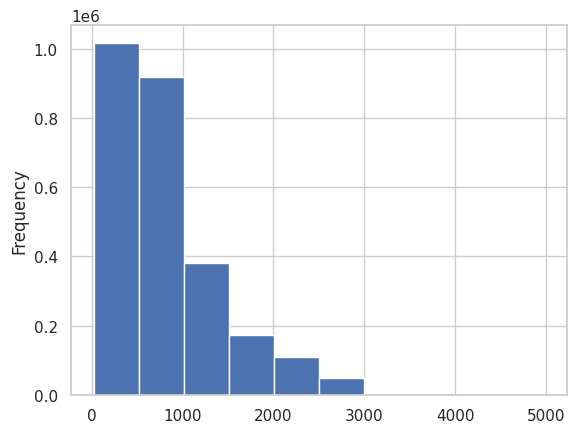

In [57]:

df['distance'].plot(kind = 'hist')

In [58]:
# Function that assigns 'short,' 'medium,' or 'long' based on distance
def dist_cat(x):
    if x < 500:
        return 'short'
    elif x <= 1000:
        return 'medium'
    return 'long'

# Create 'dist_type' column and count the number of short, medium, and long flights
df['dist_type'] = df['distance'].apply(dist_cat)
dist_type_counts = df['dist_type'].value_counts()

# Print the count of flights in each category
print(dist_type_counts)

short     974929
medium    935781
long      745605
Name: dist_type, dtype: int64


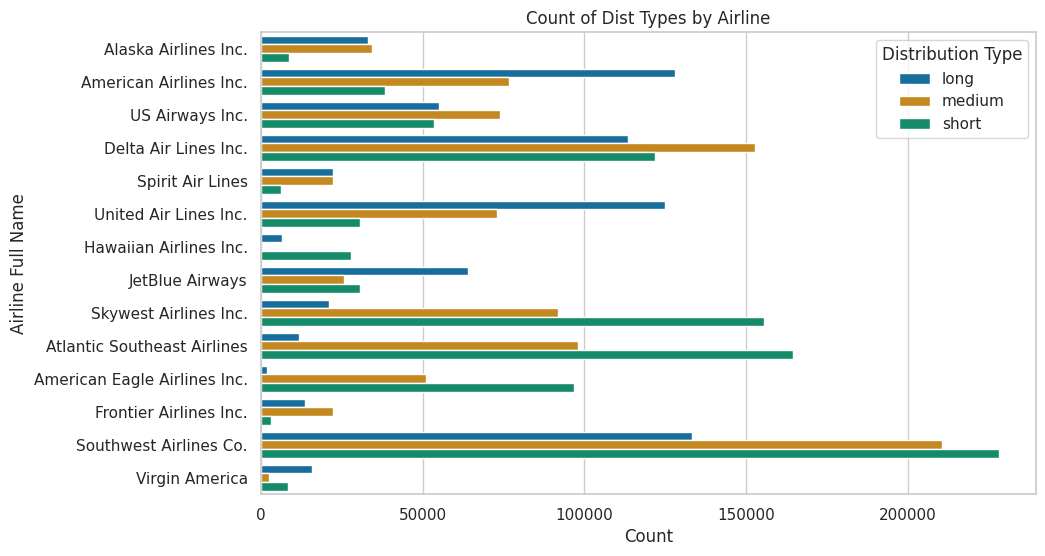

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='al_fullname', hue='dist_type', palette="colorblind")
plt.xlabel("Count")
plt.ylabel("Airline Full Name")
plt.title("Count of Dist Types by Airline")
plt.legend(title='Distribution Type')
plt.show()

Which routes have the highest probability of being canceled?

In [62]:
df['cancelled'].value_counts(normalize=True) * 100

0.0    97.781889
1.0     2.218111
Name: cancelled, dtype: float64

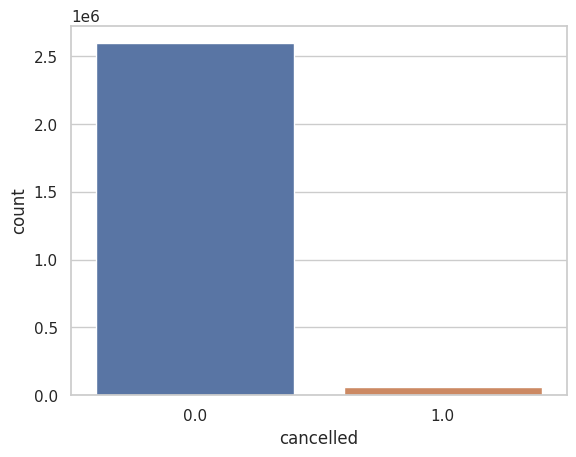

In [63]:
sns.countplot(x='cancelled', data = df)
plt.show()

In [64]:
df.groupby(['al_fullname'])['cancelled'].mean().sort_values(ascending = False).reset_index()

,al_fullname,cancelled
0,American Eagle Airlines Inc.,0.072123
1,Atlantic Southeast Airlines,0.035981
2,JetBlue Airways,0.027144
3,American Airlines Inc.,0.026191
4,US Airways Inc.,0.021420
5,Spirit Air Lines,0.020362
6,Skywest Airlines Inc.,0.019572
7,Southwest Airlines Co.,0.017638
8,United Air Lines Inc.,0.016977
9,Virgin America,0.012987


In [67]:
# Get the average cancellations by day of the week
dow_canc = df.groupby(['dow_name'])['cancelled'].mean().reset_index()
dow_canc['cancellation_mean'] = dow_canc['cancelled'] * 100
dow_canc.drop(columns=['cancelled'], inplace=True)

# Get the count of flights by day of the week
dow_count = df.groupby(['dow_name']).size().reset_index()
dow_count.rename(columns={0: 'flight_count'}, inplace=True)

# Merge the dataframes and sort by flight count
canc_df = pd.merge(dow_canc, dow_count, on='dow_name').sort_values(by='flight_count')

# Display the resulting dataframe
canc_df

,dow_name,cancellation_mean,flight_count
2,Saturday,1.526691,321283
3,Sunday,2.596723,370929
6,Wednesday,1.635239,378539
5,Tuesday,2.590980,387807
4,Thursday,2.001302,397841
1,Monday,3.729783,398495
0,Friday,1.325292,401421


In [61]:
#15 destination airports with the largest average number of flights cancelled
df.groupby('destination_airport')['cancelled'].mean().sort_values().nlargest(15)

destination_airport
ITH    0.166667
MKG    0.098802
LAW    0.098214
TXK    0.095335
CMX    0.090634
BPT    0.082996
DBQ    0.078947
CLL    0.075928
TOL    0.075157
GGG    0.074303
ACT    0.073801
SPS    0.071875
DVL    0.068966
AZO    0.068108
SJT    0.067879
Name: cancelled, dtype: float64

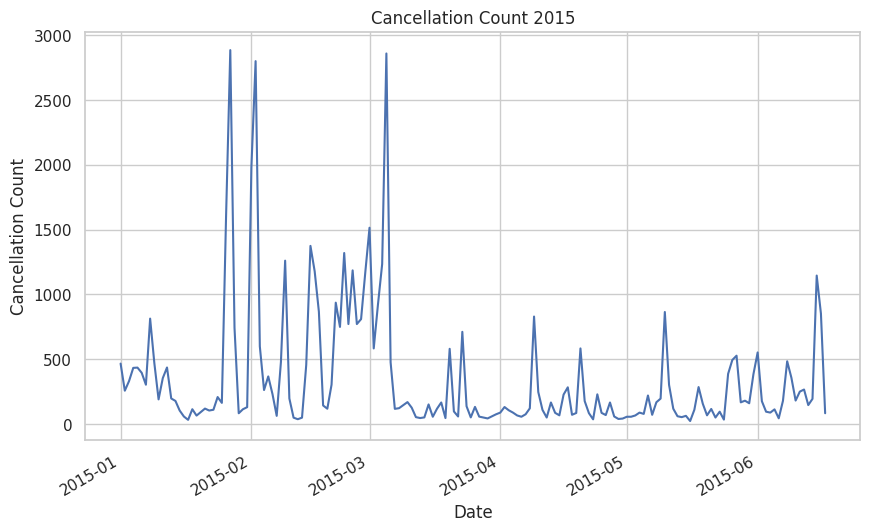

In [65]:
# Group the DataFrame by date, calculate the sum of cancellations, and sort the results
cancellation_counts = df.groupby(['date'])['cancelled'].sum().sort_values(ascending=False)

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the cancellation counts
cancellation_counts.plot()

# Set plot title and axis labels
plt.title('Cancellation Count 2015')
plt.xlabel('Date')
plt.ylabel('Cancellation Count')

# Display the plot
plt.show()

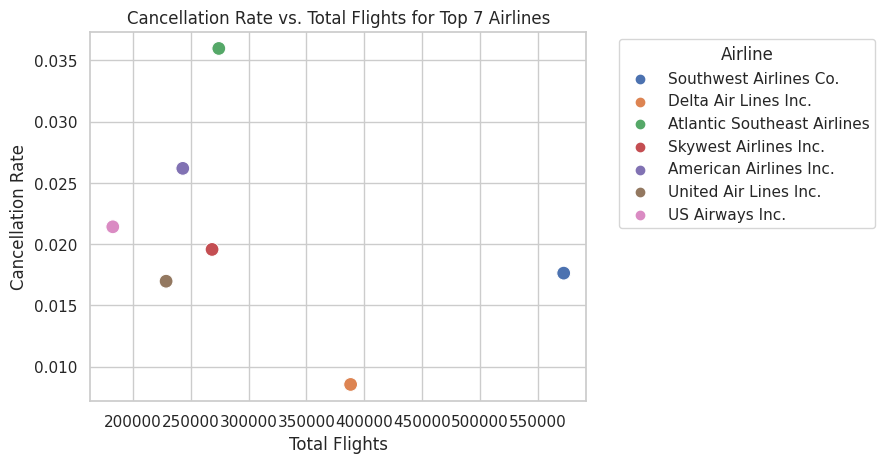

In [66]:
# Count cancellations and flights for each airline
df_cancelled = df.groupby('al_fullname')['cancelled'].agg(total_cancelled='sum', total_flights='count')
df_cancelled['cancellation_rate'] = df_cancelled['total_cancelled'] / df_cancelled['total_flights']

# Plot a scatter plot for the top 7 airlines with the highest total flights
top_airlines = df_cancelled.nlargest(7, 'total_flights')
scatter_plot = sns.scatterplot(data=top_airlines.reset_index(), x='total_flights', y='cancellation_rate', hue='al_fullname', marker='o', s=100)
plt.xlabel('Total Flights')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate vs. Total Flights for Top 7 Airlines')

# Move the legend outside the graph
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()





Forecasting the count of cancelled American Airlines flights.

In [68]:
#subset df to include only american airline flights
al_df = df[(df['airline'] == 'AA')]

#drop observations from october
al_df[al_df['month'] != 10]

#subset dataframe to predictive columns
#removing columns where data isn't available(e.g. departure delay isn't known for cancelled flight)
relevant_cols = ['cancelled','month','day_of_week','distance','scheduled_time', 'sched_hour']
al_df = al_df[relevant_cols]

In [69]:
#add day of week, route, hour, month dummy variables
day_dummys = pd.get_dummies(al_df['day_of_week'], prefix = 'day')
month_dummys = pd.get_dummies(al_df['month'], prefix = 'month')
hour_dummys = pd.get_dummies(al_df['sched_hour'], prefix = 'hour')

In [70]:
#concat dummy vars to dataframe
al_df = pd.concat([al_df, day_dummys, month_dummys, hour_dummys], axis = 1)
al_df = al_df.drop(columns = ['month','day_of_week', 'sched_hour'])

In [71]:
al_df.head()

,cancelled,distance,scheduled_time,day_1,day_2,day_3,day_4,day_5,day_6,day_7,month_1,month_2,month_3,month_4,month_5,month_6,hour_00,hour_01,hour_02,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
1,0.0,2330.0,280.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,2342.0,285.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.0,1464.0,195.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0.0,2174.0,268.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0.0,2724.0,338.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

#split data into features + target
X = al_df.drop('cancelled', 1)
y = al_df.cancelled

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Fit and transform the data to oversample the minority class
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the balanced data
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

#MODEL

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [81]:
from sklearn.impute import SimpleImputer

# Handle missing values with simple imputation
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9640478376980482
Confusion Matrix:
 [[43881  3406]
 [    0 47450]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     47287
         1.0       0.93      1.00      0.97     47450

    accuracy                           0.96     94737
   macro avg       0.97      0.96      0.96     94737
weighted avg       0.97      0.96      0.96     94737

